## Re-exploratory Analysis

As the start of our second pass through the epicycle, we wish to refine and expand our exploratory analysis. We will compute vertex and edge features on our graphs across multiple scales and multiple datasets.

#### Setup

In [9]:
from scipy.stats import gaussian_kde
from ipywidgets import widgets

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections
import os

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

import matplotlib
matplotlib.rc('font', **font)

In [10]:
# Initializing dataset names
dnames = list(['../data/desikan/MRN114', '../data/desikan/KKI2009', '../data/desikan/SWU4'])
print "Datasets: " + ", ".join(dnames)
print "D = " + str(len(dnames))

# Getting graph names
fs = dict()
for dd in dnames:
        fs[dd] = [root+'/'+fl for root, dir, files in os.walk(dd) for fl in files if fl.endswith(".graphml")]
# fs[dnames[1]]

Datasets: ../data/desikan/MRN114, ../data/desikan/KKI2009, ../data/desikan/SWU4
D = 3


In [11]:
def loadGraphs(filenames, printer=False):
    gstruct = collections.OrderedDict()
    for idx, files in enumerate(filenames):
        if printer:
            print "Loading: " + files
        gstruct[files] = nx.read_graphml(files)
    return gstruct

### MRN114 Dataset

In [12]:
mygs = loadGraphs(fs[fs.keys()[0]], printer=False) # only loads graphs for kki dataset
mygs.keys()

['../data/desikan/MRN114/MRN114_M87102217_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87102806_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87103074_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87105476_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87107085_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87108094_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87111487_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87111924_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87114047_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87114064_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87115498_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87115517_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87117119_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87117167_1_desikan_sg.graphml',
 '../data/desikan/MRN114/MRN114_M87120962_1_desikan_sg.graphml',
 '../data/desikan/MRN114/

#### Number of Non-Zero (NNZ) edge weights

In [13]:
nnz = collections.OrderedDict((key, len(nx.edges(mygs[key]))) for key in mygs)

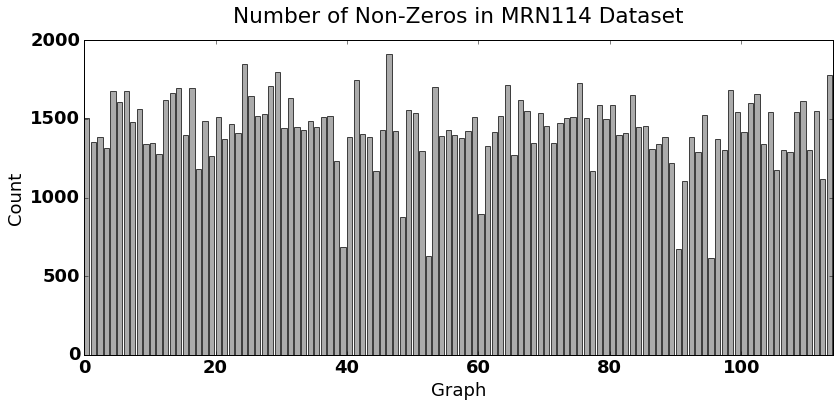

In [14]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(nnz)),nnz.values(), alpha=0.7, color='#888888')
plt.title('Number of Non-Zeros in MRN114 Dataset', y = 1.04)
plt.ylabel('Count')
plt.xlabel('Graph')
plt.xlim((0, len(nnz.keys())))
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-nnz.png')
plt.show()

#### Vertex Degree

In [15]:
degrees = collections.OrderedDict((key, np.array(nx.degree(mygs[key]).values())) for key in mygs)

avg_degrees = [np.mean(degrees[key]) for key in degrees]

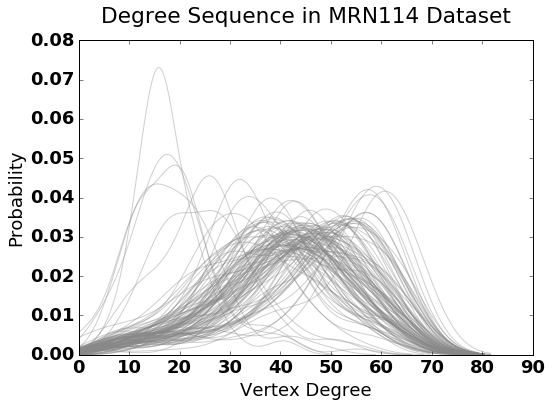

In [22]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in degrees.keys():
    dens = gaussian_kde(degrees[key])
    x = np.linspace(0, 1.2*np.max(degrees[key]), 1000)
    plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Degree Sequence in MRN114 Dataset', y = 1.04)
plt.ylabel('Probability')
plt.xlabel('Vertex Degree')
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-degree.png')
plt.show()

#### Edge weight

In [17]:
e_weights = collections.OrderedDict((key, [mygs[key].get_edge_data(e[0],e[1])['weight']
             for e in mygs[key].edges()]) for key in mygs)
avg_e_weights = [{'N': len(e_weights[key]),
                  'mean':np.mean(e_weights[key]),
                  'std':np.std(e_weights[key])} for key in e_weights]

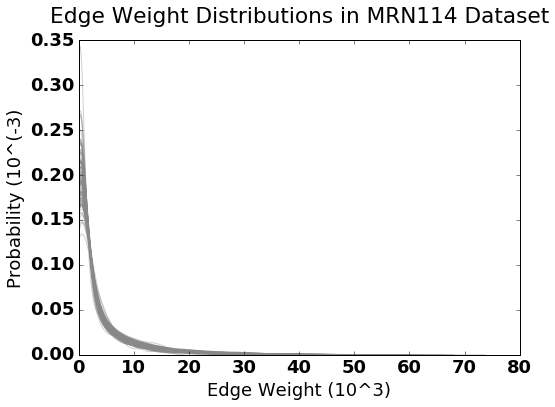

In [20]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in e_weights.keys():
    dens = gaussian_kde(e_weights[key])
    x = np.linspace(0, 1.2*np.max(e_weights[key]), 1000)
    plt.plot(x/1000, 1000*dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Edge Weight Distributions in MRN114 Dataset', y = 1.04)
plt.ylabel('Probability (10^(-3)')
plt.xlabel('Edge Weight (10^3)')
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-edgeweight.png')
plt.show()

#### Edge count

In [23]:
e_count = collections.OrderedDict((key, len(e_weights[key])) for key in e_weights)

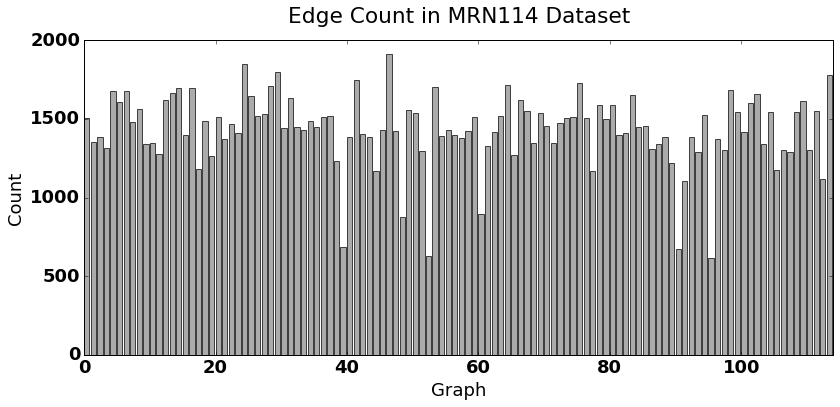

In [24]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(e_count)),e_count.values(), alpha=0.7, color='#888888')
plt.title('Edge Count in MRN114 Dataset', y = 1.04)
plt.ylabel('Count')
plt.xlabel('Graph')
plt.xlim((0, len(e_count.keys())))
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-edges.png')
plt.show()

#### Clustering Coefficient

In [25]:
ccoefs = collections.OrderedDict((key, nx.clustering(mygs[key]).values()) for key in mygs)
avg_ccoefs = [np.mean(ccoefs[key]) for key in ccoefs]

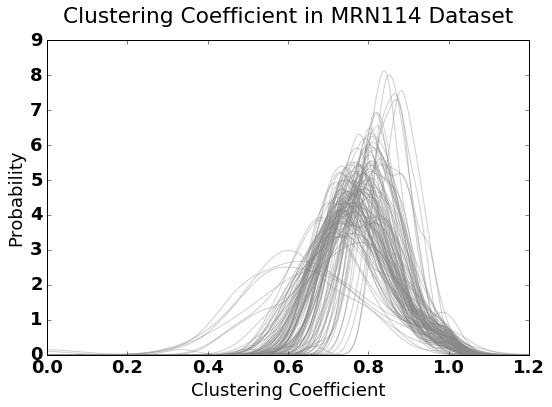

In [26]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in ccoefs.keys():
    dens = gaussian_kde(ccoefs[key])
    x = np.linspace(0, 1.2*np.max(ccoefs[key]), 1000)
    plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Clustering Coefficient in MRN114 Dataset', y = 1.04)
plt.ylabel('Probability')
plt.xlabel('Clustering Coefficient')
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-cc.png')
plt.show()

#### Scan Statistic-i

In [27]:
i = 1
def scan_statistic(mygs, i):
    ss = collections.OrderedDict()
    for key in mygs.keys():
        g = mygs[key]
        tmp = np.array(())
        for n in g.nodes():
            subgraph = nx.ego_graph(g, n, radius = i)
            tmp = np.append(tmp, np.sum([subgraph.get_edge_data(e[0],e[1])['weight'] for e in subgraph.edges()]))
        ss[key] = tmp
    return ss

ss1 = scan_statistic(mygs, i)

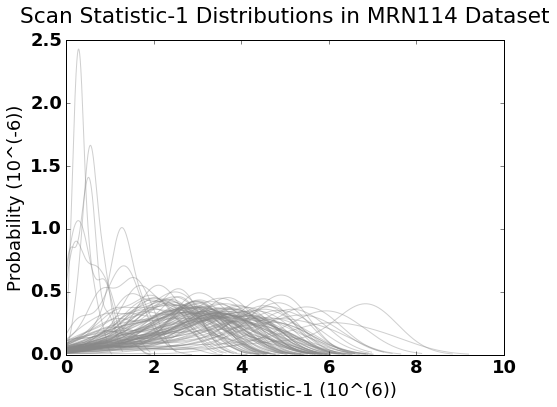

In [28]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in ss1.keys():
    dens = gaussian_kde(ss1[key])
    x = np.linspace(0, 1.2*np.max(ss1[key]), 1000)
    plt.plot(x/10**6, 1*10**6*dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Scan Statistic-1 Distributions in MRN114 Dataset', y = 1.04)
plt.ylabel('Probability (10^(-6))')
plt.xlabel('Scan Statistic-1 (10^(6))')
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-ss1.png')
plt.show()

In [19]:
i = 2
ss2 = scan_statistic(mygs, i)

LinAlgError: singular matrix

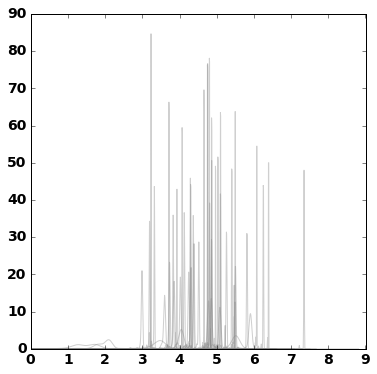

In [23]:
fig = plt.figure(figsize=(6,6))
plt.hold(True)
for key in ss2.keys():
    dens = gaussian_kde(ss2[key]+1)
    x = np.linspace(0, 1.2*np.max(ss2[key]), 1000)
    plt.plot(x/10**6, 10**6*dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Scan Statistic-2 Distributions in KKI2009 Dataset', y = 1.04)
plt.ylabel('Probability (10^(-6))')
plt.xlabel('Scan Statistic-2 (10^(6))')
plt.show()

#### Eigen value

In [29]:
laplacian = collections.OrderedDict((key, nx.normalized_laplacian_matrix(mygs[key])) for key in mygs)
eigs = collections.OrderedDict((key, np.sort(np.linalg.eigvals(laplacian[key].A))[::-1]) for key in laplacian)

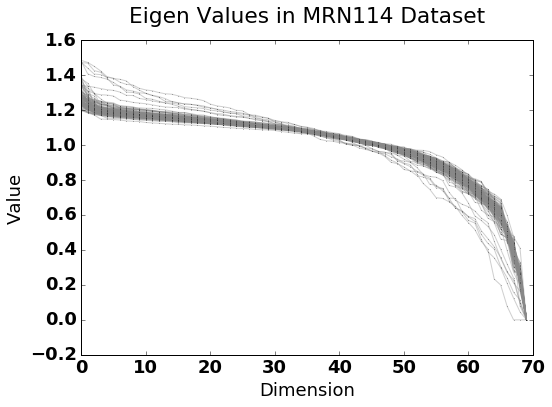

In [30]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in eigs.keys():
#     dens = gaussian_kde(eigs[key])
#     x = np.linspace(0, 1.2*np.max(eigs[key]), 1000)
    plt.plot(eigs[key], 'ro-', markersize=0.4, color='#888888', alpha=0.4)
plt.title('Eigen Values in MRN114 Dataset', y = 1.04)
plt.ylabel('Value')
plt.xlabel('Dimension')
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-eigen.png')
plt.show()

#### Betweenness Centrality

In [31]:
centrality = collections.OrderedDict((key, nx.algorithms.betweenness_centrality(mygs[key]).values())
                                     for key in mygs.keys())

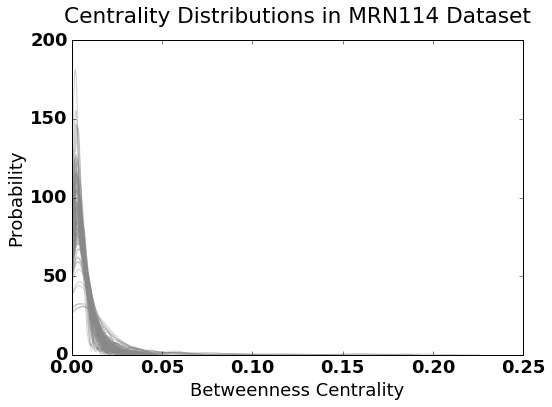

In [32]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in centrality.keys():
    dens = gaussian_kde(centrality[key])
    x = np.linspace(0, 1.2*np.max(centrality[key]), 1000)
    plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Centrality Distributions in MRN114 Dataset', y = 1.04)
plt.ylabel('Probability')
plt.xlabel('Betweenness Centrality')
plt.tight_layout()
plt.savefig('../figs/distribs/MRN114-centrality.png')
plt.show()

### SWU4 Dataset

In [33]:
mygs = loadGraphs(fs[fs.keys()[1]], printer=False) # only loads graphs for swu dataset

#### Number of Non-Zero (NNZ) edge weights

In [34]:
nnz = collections.OrderedDict((key, len(nx.edges(mygs[key]))) for key in mygs)

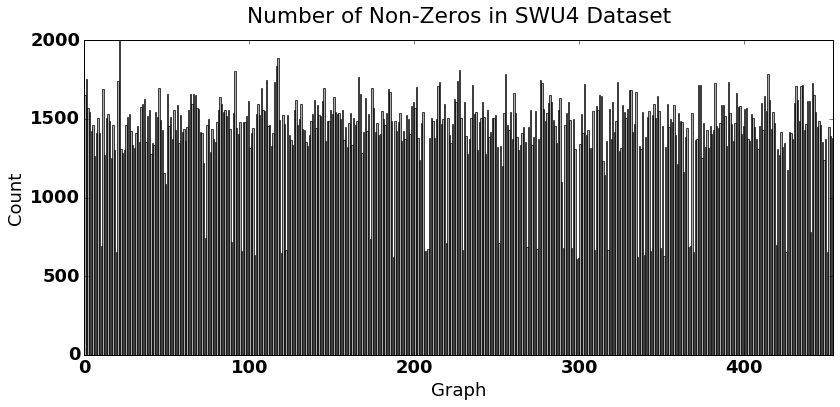

In [35]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(nnz)),nnz.values(), alpha=0.7, color='#888888')
plt.title('Number of Non-Zeros in SWU4 Dataset', y = 1.04)
plt.ylabel('Count')
plt.xlabel('Graph')
plt.xlim((0, len(nnz.keys())))
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-nnz.png')
plt.show()

#### Vertex Degree

In [36]:
degrees = collections.OrderedDict((key, np.array(nx.degree(mygs[key]).values())) for key in mygs)

avg_degrees = [np.mean(degrees[key]) for key in degrees]

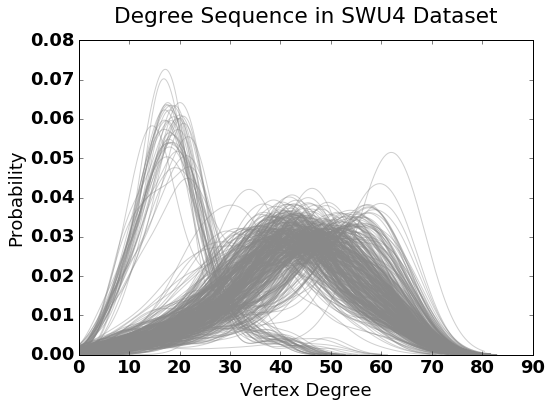

In [37]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in degrees.keys():
    dens = gaussian_kde(degrees[key])
    x = np.linspace(0, 1.2*np.max(degrees[key]), 1000)
    plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Degree Sequence in SWU4 Dataset', y = 1.04)
plt.ylabel('Probability')
plt.xlabel('Vertex Degree')
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-degree.png')
plt.show()

#### Edge weight

In [38]:
e_weights = collections.OrderedDict((key, [mygs[key].get_edge_data(e[0],e[1])['weight']
             for e in mygs[key].edges()]) for key in mygs)
avg_e_weights = [{'N': len(e_weights[key]),
                  'mean':np.mean(e_weights[key]),
                  'std':np.std(e_weights[key])} for key in e_weights]

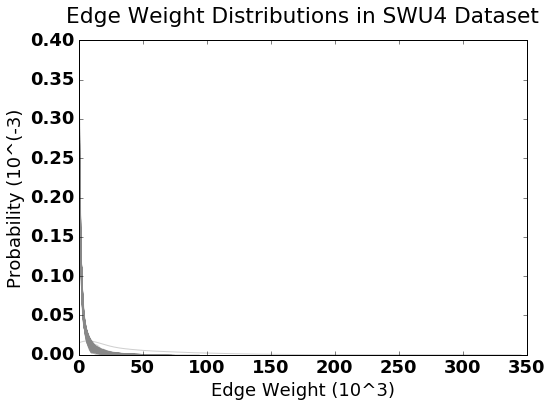

In [39]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in e_weights.keys():
    dens = gaussian_kde(e_weights[key])
    x = np.linspace(0, 1.2*np.max(e_weights[key]), 1000)
    plt.plot(x/1000, 1000*dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Edge Weight Distributions in SWU4 Dataset', y = 1.04)
plt.ylabel('Probability (10^(-3)')
plt.xlabel('Edge Weight (10^3)')
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-edgeweight.png')
plt.show()

#### Edge count

In [40]:
e_count = collections.OrderedDict((key, len(e_weights[key])) for key in e_weights)

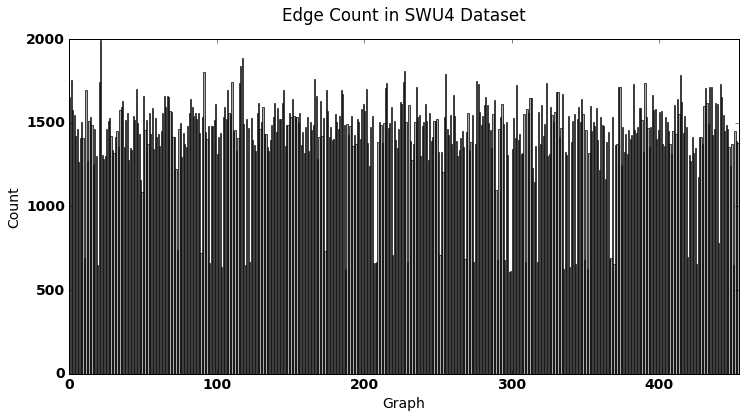

In [104]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(e_count)),e_count.values(), alpha=0.7, color='#888888')
plt.title('Edge Count in SWU4 Dataset', y = 1.04)
plt.ylabel('Count')
plt.xlabel('Graph')
plt.xlim((0, len(e_count.keys())))
plt.savefig('../figs/distribs/SWU4-edges.png')
plt.show()

#### Clustering Coefficient

In [41]:
ccoefs = collections.OrderedDict((key, nx.clustering(mygs[key]).values()) for key in mygs)
avg_ccoefs = [np.mean(ccoefs[key]) for key in ccoefs]

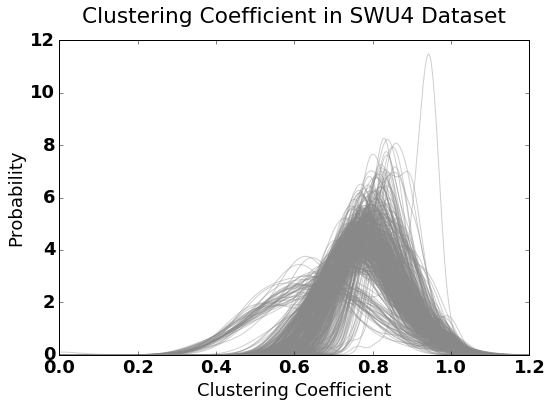

In [42]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in ccoefs.keys():
    dens = gaussian_kde(ccoefs[key])
    x = np.linspace(0, 1.2*np.max(ccoefs[key]), 1000)
    plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Clustering Coefficient in SWU4 Dataset', y = 1.04)
plt.ylabel('Probability')
plt.xlabel('Clustering Coefficient')
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-cc.png')
plt.show()

#### Scan Statistic-i

In [43]:
i = 1
def scan_statistic(mygs, i):
    ss = collections.OrderedDict()
    for key in mygs.keys():
        g = mygs[key]
        tmp = np.array(())
        for n in g.nodes():
            subgraph = nx.ego_graph(g, n, radius = i)
            tmp = np.append(tmp, np.sum([subgraph.get_edge_data(e[0],e[1])['weight'] for e in subgraph.edges()]))
        ss[key] = tmp
    return ss

ss1 = scan_statistic(mygs, i)

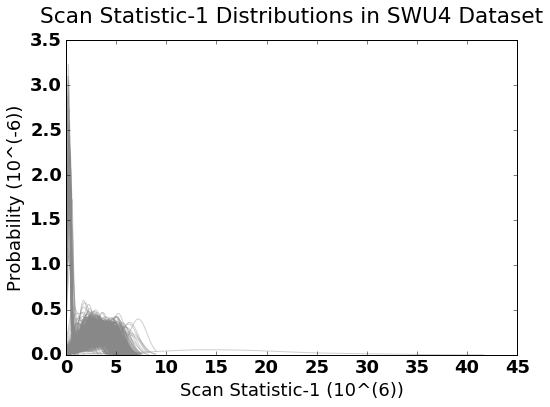

In [44]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in ss1.keys():
    dens = gaussian_kde(ss1[key])
    x = np.linspace(0, 1.2*np.max(ss1[key]), 1000)
    plt.plot(x/10**6, 1*10**6*dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Scan Statistic-1 Distributions in SWU4 Dataset', y = 1.04)
plt.ylabel('Probability (10^(-6))')
plt.xlabel('Scan Statistic-1 (10^(6))')
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-ss1.png')
plt.show()

In [19]:
i = 2
ss2 = scan_statistic(mygs, i)

LinAlgError: singular matrix

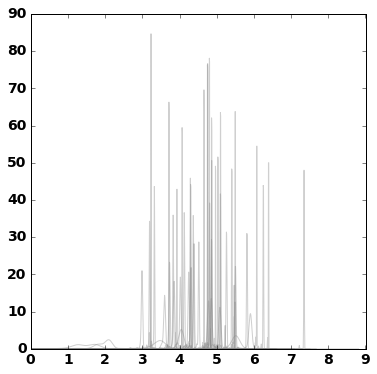

In [23]:
fig = plt.figure(figsize=(6,6))
plt.hold(True)
for key in ss2.keys():
    dens = gaussian_kde(ss2[key]+1)
    x = np.linspace(0, 1.2*np.max(ss2[key]), 1000)
    plt.plot(x/10**6, 10**6*dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Scan Statistic-2 Distributions in KKI2009 Dataset', y = 1.04)
plt.ylabel('Probability (10^(-6))')
plt.xlabel('Scan Statistic-2 (10^(6))')
plt.show()

#### Eigen value

In [45]:
laplacian = collections.OrderedDict((key, nx.normalized_laplacian_matrix(mygs[key])) for key in mygs)
eigs = collections.OrderedDict((key, np.sort(np.linalg.eigvals(laplacian[key].A))[::-1]) for key in laplacian)

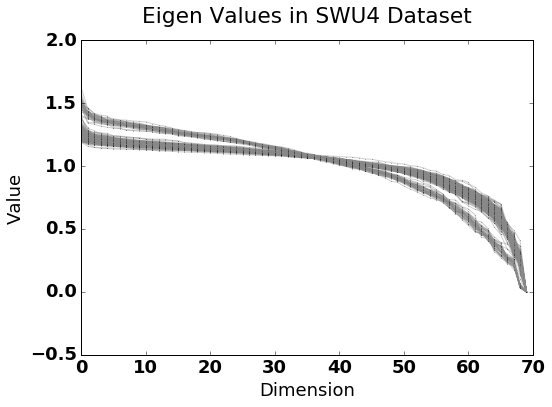

In [46]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in eigs.keys():
#     dens = gaussian_kde(eigs[key])
#     x = np.linspace(0, 1.2*np.max(eigs[key]), 1000)
    plt.plot(eigs[key], 'ro-', markersize=0.4, color='#888888', alpha=0.4)
plt.title('Eigen Values in SWU4 Dataset', y = 1.04)
plt.ylabel('Value')
plt.xlabel('Dimension')
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-eigen.png')
plt.show()

#### Betweenness Centrality

In [47]:
centrality = collections.OrderedDict((key, nx.algorithms.betweenness_centrality(mygs[key]).values())
                                     for key in mygs.keys())

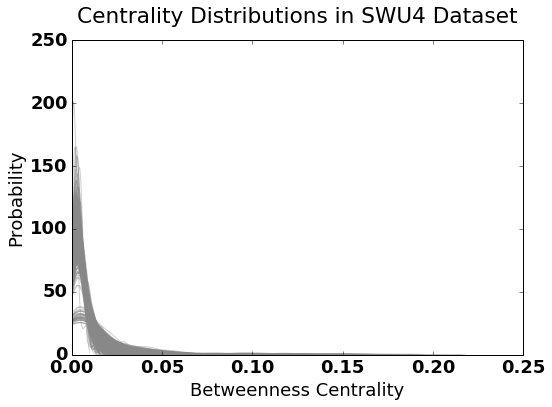

In [48]:
fig = plt.figure(figsize=(8,6))
plt.hold(True)
for key in centrality.keys():
    dens = gaussian_kde(centrality[key])
    x = np.linspace(0, 1.2*np.max(centrality[key]), 1000)
    plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
plt.title('Centrality Distributions in SWU4 Dataset', y = 1.04)
plt.ylabel('Probability')
plt.xlabel('Betweenness Centrality')
plt.tight_layout()
plt.savefig('../figs/distribs/SWU4-centrality.png')
plt.show()